In [0]:
import keras

In [0]:
from keras.datasets import mnist

# Import pandas 
import pandas as pd

In [59]:
keras.backend.backend()

'tensorflow'

In [0]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [61]:
#Data exploration
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

In [62]:
# First rows of `red` 
red.head()

# Last rows of `white`
white.tail()

# Take a sample of 5 rows of `red`
red.sample(5)

# Describe `white`
white.describe()

# Double check for null values in `red`
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


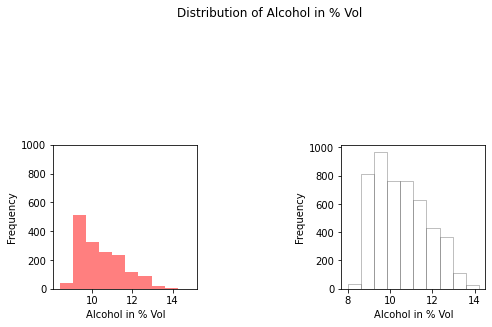

In [63]:
#Visualization
#Alcohol
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

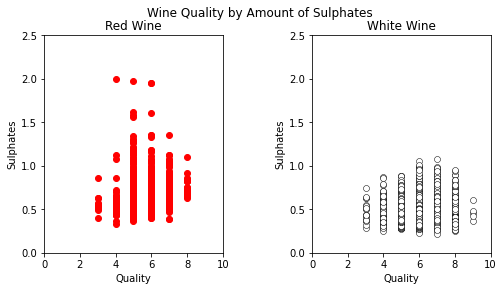

In [64]:
# Sulphates %

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

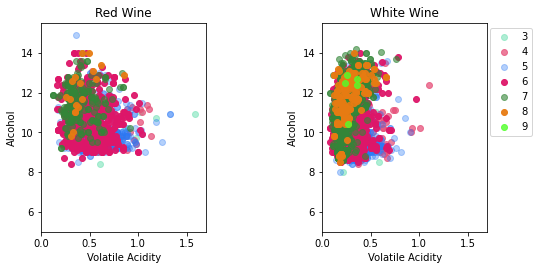

In [65]:
#Acidity
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

Preprocess Data


In [0]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

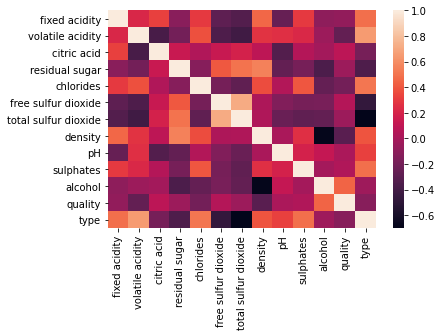

In [67]:
#Corelation Matrix
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#sns.plt.show()

In [0]:
# TRain and Test Sets
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
# X=wines.iloc[:,0:11]
X=wines.loc[:, wines.columns != 'quality']

# Specify the target labels and flatten the array
y= np.ravel(wines.quality)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
#Standardize Data
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

Model Data

In [0]:
import tensorflow as tf
# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential

# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(164, activation='relu', input_shape=(12,)))

# Add one hidden layer 
model.add(Dense(64, activation='relu'))

# Add an output layer 
model.add(Dense(10, activation='softmax'))

In [71]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_182 (Dense)            (None, 164)               2132      
_________________________________________________________________
dense_183 (Dense)            (None, 64)                10560     
_________________________________________________________________
dense_184 (Dense)            (None, 10)                650       
Total params: 13,342
Trainable params: 13,342
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.08275063,  0.02897124, -0.15270466, ..., -0.00282557,
         -0.12820731,  0.11472695],
        [ 0.11907406, -0.15194806,  0.03540468, ...,  0.03290187,
         -0.01894209, -0.12728468],
        [-0.12084521, -0.02370894, -0.08629457, ..., -0.07674246,
          0.02728057, -0.18420957],
        ...,
        [-0.05052315, -0.15178952,  0.00955263, ...,  0.03257436,
          0.00439166, -0.11209934],
        [ 0.12701924,  0.1843275 ,  0.1221378 , ..., -0.03582041,
         -0.16695239, -0.18268742],
        [ 0.00747858,  0.09004612, -0.0755185 , ...,  0.10360374,
          0.03237689, -0.16135588]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Compile and Fit

In [72]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20)

Epoch 1/20
136/136 [==============================] - 0s 2ms/step - loss: 1.2732 - accuracy: 0.5267
Epoch 2/20
136/136 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.5572
Epoch 3/20
136/136 [==============================] - 0s 2ms/step - loss: 1.0474 - accuracy: 0.5699
Epoch 4/20
136/136 [==============================] - 0s 2ms/step - loss: 1.0303 - accuracy: 0.5779
Epoch 5/20
136/136 [==============================] - 0s 2ms/step - loss: 1.0129 - accuracy: 0.5751
Epoch 6/20
136/136 [==============================] - 0s 2ms/step - loss: 1.0025 - accuracy: 0.5756
Epoch 7/20
136/136 [==============================] - 0s 2ms/step - loss: 0.9889 - accuracy: 0.5816
Epoch 8/20
136/136 [==============================] - 0s 2ms/step - loss: 0.9770 - accuracy: 0.5896
Epoch 9/20
136/136 [==============================] - 0s 2ms/step - loss: 0.9692 - accuracy: 0.5917
Epoch 10/20
136/136 [==============================] - 0s 2ms/step - loss: 0.9626 - accuracy: 0.5921

In [73]:
loss, accuracy  = model.evaluate(X_test, y_test)

68/68 [==============================] - 0s 1ms/step - loss: 1.0420 - accuracy: 0.5501


In [74]:
score = model.evaluate(X_test, y_test)

68/68 [==============================] - 0s 1ms/step - loss: 1.0420 - accuracy: 0.5501


Predict Values

In [0]:
y_pred = model.predict_classes(X_test)

In [76]:
y_pred

array([6, 5, 7, ..., 6, 5, 5])

Evaluate Model

In [77]:
score = model.evaluate(X_test, y_test,verbose=1)
# for our case relu performs better than sigmoid
print(score)


68/68 [==============================] - 0s 1ms/step - loss: 1.0420 - accuracy: 0.5501
[1.0420074462890625, 0.5501165390014648]


In [80]:
from keras.models import Sequential
from keras.layers import Dense
# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(164, activation='sigmoid', input_shape=(12,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20)

loss, accuracy  = model.evaluate(X_test, y_test)

Epoch 1/20
4352/4352 [==============================] - 0s 46us/step - loss: 1.5582 - accuracy: 0.4028
Epoch 2/20
4352/4352 [==============================] - 0s 40us/step - loss: 1.3177 - accuracy: 0.4276
Epoch 3/20
4352/4352 [==============================] - 0s 40us/step - loss: 1.2959 - accuracy: 0.4274
Epoch 4/20
4352/4352 [==============================] - 0s 39us/step - loss: 1.2852 - accuracy: 0.4306
Epoch 5/20
4352/4352 [==============================] - 0s 38us/step - loss: 1.2779 - accuracy: 0.4281
Epoch 6/20
4352/4352 [==============================] - 0s 39us/step - loss: 1.2723 - accuracy: 0.4297
Epoch 7/20
4352/4352 [==============================] - 0s 38us/step - loss: 1.2674 - accuracy: 0.4375
Epoch 8/20
4352/4352 [==============================] - 0s 39us/step - loss: 1.2622 - accuracy: 0.4416
Epoch 9/20
4352/4352 [==============================] - 0s 40us/step - loss: 1.2572 - accuracy: 0.4419
Epoch 10/20
4352/4352 [==============================] - 0s 41us/step - l

In [81]:
accuracy




0.5067598819732666

In [82]:
loss

1.1900016356737186

K Fold Validation
  

In [83]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X=X.values
seed = 7
np.random.seed(seed)

cvscores = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    # Initialize the constructor
    model = Sequential()
    model.add(Dense(164, activation='relu', input_shape=(12,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
    model.fit(X[train], y[train],epochs=10, batch_size=1, verbose=1)
    
    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("--------------------->>>")
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("--------------------->>>")
    cvscores.append(scores[1] * 100)
print("----------->>>")
print("---------->>>")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.5531 - accuracy: 0.4108
Epoch 2/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.2483 - accuracy: 0.4491
Epoch 3/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.2054 - accuracy: 0.4710
Epoch 4/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.1821 - accuracy: 0.4797
Epoch 5/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.1660 - accuracy: 0.4887
Epoch 6/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.1591 - accuracy: 0.4880
Epoch 7/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.1468 - accuracy: 0.5005
Epoch 8/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.1390 - accuracy: 0.4905
Epoch 9/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.1312 - accuracy: 0.5028
Epoch 10/10
5197/5197 [==============================] - 6s 1ms/step - loss: 1.127

**HyperParameter Tuning with Hypers**

In [84]:
!pip install hyperas
!pip install hyperopt

In [0]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

# from tensorflow.python.keras.layers import Dense, Dropout, Activation
# from tensorflow.python.keras import Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


from keras import utils as np_utils

In [0]:

def data():
    '''
    Data providing function:
    '''
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, Activation

    # Read in white wine data 
    white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

    # Read in red wine data 
    red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
    # Add `type` column to `red` with value 1
    red['type'] = 1

    # Add `type` column to `white` with value 0
    white['type'] = 0

    # Append `white` to `red`
    wines = red.append(white, ignore_index=True)

    # Specify the data 
    X=wines.loc[:, wines.columns != 'quality']
    # Specify the target labels and flatten the array
    y= np.ravel(wines.quality)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    nb_classes = 10
    Y_train = np_utils.to_categorical(Y_train, nb_classes)
    Y_test = np_utils.to_categorical(Y_test, nb_classes)
    return X_train, Y_train, X_test, Y_test


In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def model(X_train, Y_train, X_test, Y_test):
    '''
    Model providing function:
    '''
    model = Sequential()

    model.add(Dense(128, input_shape=(12,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([32, 64, 128])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))

    # If we choose 'four', add an additional fourth layer
    if {{choice(['three', 'four'])}} == 'four':
        model.add(Dense(50))
        model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer={{choice(['adam', 'sgd'])}},
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size={{choice([64, 128])}},
              epochs=5,
              verbose=2,
              validation_data=(X_test, Y_test))
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

To run Hyperas on Google Colab we have to load the file from Drive..

In [0]:
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='keras-wine.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('keras-wine.ipynb')

In [89]:
#BEST run

best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          max_evals=10,
                                          algo=tpe.suggest,
                                          notebook_name='keras-wine', # This is important!
                                          trials=Trials())

X_train, Y_train, X_test, Y_test = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from pydrive.auth import GoogleAuth
except:
    pass

try:
    from pydrive.drive import GoogleDrive
except:
    pass

try:
    from google.colab import auth
except:
    pass

try:
    from oauth2client.client import GoogleCredentials
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'Dropout': hp.uniform('Dropout', 0, 1),
        'Dense': hp.choice('Dense', [32, 64, 128]),
        'Activation': hp.choice('Activation', 

In [90]:
#Lets see
best_run

{'Activation': 0,
 'Dense': 1,
 'Dropout': 0.7342146978592597,
 'Dropout_1': 0.692539034315719,
 'Dropout_2': 0,
 'batch_size': 1,
 'optimizer': 0}

In [91]:
best_model